In [1]:
import pandas as pd
import numpy as np
import glob
import re
import seaborn as sns
from scipy.stats import linregress
import matplotlib.pyplot as plt
%matplotlib inline

---
## Get data

In [2]:
data = []
for player in glob.glob('../LSTM-Neural-Network-for-Time-Series-Prediction/data/*.csv'):
    tmp = pd.read_csv(player)
    data.append(tmp)
data = pd.concat(data)

In [3]:
data.head()

,Unnamed: 0,Game_Id,Team,Player,Player_Id,Date,Goal,First_Assist,Second_Assist,Total_Points
0,412,2013_20014,VAN,RYAN KESLER,8470616,2013-10-03 00:00:00,0.0,0.0,0.0,0.0
1,1024,2013_20030,VAN,RYAN KESLER,8470616,2013-10-05 00:00:00,1.0,0.0,0.0,1.0
2,1174,2013_20034,VAN,RYAN KESLER,8470616,2013-10-06 00:00:00,0.0,0.0,0.0,0.0
3,1520,2013_20043,VAN,RYAN KESLER,8470616,2013-10-08 00:00:00,0.0,0.0,0.0,0.0
4,2016,2013_20056,VAN,RYAN KESLER,8470616,2013-10-10 00:00:00,0.0,0.0,0.0,0.0


In [4]:
years = ['20132014', '20142015', '20152016', '20162017', '20172018', '20182019']
start_date = [pd.datetime(2013, 10, 1), 
              pd.datetime(2014, 10, 1), 
              pd.datetime(2015, 10, 1), 
              pd.datetime(2016, 10, 1),
              pd.datetime(2017, 10, 1),
              pd.datetime(2018, 10, 1)]
end_date = [pd.datetime(2014, 4, 13), 
            pd.datetime(2015, 4, 11), 
            pd.datetime(2016, 4, 10), 
            pd.datetime(2017, 4, 9),
            pd.datetime(2018, 4, 8),
            pd.datetime(2019, 4, 6)]

yearly_data = {}
i = 0
for y in years:
    print(y)
    print('Points...')
    data['Date'] = pd.to_datetime(data['Date'])
    mask = (data['Date'] > start_date[i]) & (data['Date'] <= end_date[i])
    data_tmp = data.loc[mask]
    yearly_data[y] = data_tmp
    
    i+=1

20132014
Points...
20142015
Points...
20152016
Points...
20162017
Points...
20172018
Points...
20182019
Points...


In [5]:
data_1718 = yearly_data['20172018']
data_1718_agg = data_1718.groupby('Player_Id').agg({'Player': np.unique, 'Total_Points': sum})
data_1718_agg['Name'] = data_1718_agg.Player.apply(lambda player: re.sub(r'\W+', '', f'{player}').upper())
data_1718_agg.set_index('Name', inplace=True)
data_1718_agg.head()

,Player,Total_Points
Name,,
JAROMIRJAGR,JAROMIR JAGR,7.0
MATTCULLEN,MATT CULLEN,22.0
ZDENOCHARA,ZDENO CHARA,24.0
JOETHORNTON,JOE THORNTON,36.0
PATRICKMARLEAU,PATRICK MARLEAU,47.0


---
## 2018 data

In [6]:
nhl18 = pd.read_csv('../data/NHL 2017-18.csv', encoding = "utf-8", sep='\t')
nhl18.columns = [str(col) + '_18' for col in nhl18.columns]

In [7]:
nhl18['Name'] = nhl18.apply(lambda player: re.sub(r'\W+', '', f'{player["Last Name_18"]}{player["First Name_18"]}').upper(), axis=1)

In [8]:
nhl18.set_index('Name', inplace=True)

In [9]:
nhl18.rename({'BURMISTROVALEX': 'BURMISTROVALEXANDER',
           'BURROWSALEX': 'BURROWSALEXANDRE',
           'CAMMALLERIMIKE': 'CAMMALLERIMICHAEL',
           'DEANGELOTONY': 'DEANGELOANTHONY',
           'DIDOMENICOCHRIS': 'DIDOMENICOCHRISTOPHER',
           'EDLERALEX': 'EDLERALEXANDER',
           'ENSTROMTOBY': 'ENSTROMTOBIAS',
           'FERLANDMICHEAL': 'FERLANDMICHAEL',
           'HINOSTROZAVINNIE': 'HINOSTROZAVINCENT',
           'KULEMINNIKOLAY': 'KULEMINNIKOLAI',
           'MARCHESSAULTJONATHAN': 'AUDYMARCHESSAULTJONATHAN',
           'MATHESONMIKE': 'MATHESONMICHAEL',
           'MORRISSEYJOSH': 'MORRISSEYJOSHUA',
           'PETROVICALEX': 'PETROVICALEXANDER',
           'RADULOVALEX': 'RADULOVALEXANDER',
           'WENNBERGALEX': 'WENNBERGALEXANDER'}, inplace = True)

In [10]:
nhl18.head()

,Born_18,City_18,Pr/St_18,Cntry_18,Nat_18,Ht_18,Wt_18,DftYr_18,DftRd_18,Ovrl_18,...,A.1_18,PTS.1_18,+/-.1_18,PIM.1_18,Shot_18,TOI.4_18,OPS.1_18,DPS.1_18,PS.1_18,Unnamed: 189_18
Name,,,,,,,,,,,,,,,,,,,,,
HAYESJIMMY,1989-11-21,Dorchester,MA,USA,USA,77,215,2008.0,2.0,60.0,...,55,109,-29,149,530,4120,"6,9","3,2","10,1","8,4"
LEHTERAJORI,1987-12-23,Helsinki,NaN,FIN,FIN,74,212,2008.0,3.0,65.0,...,75,108,19,134,298,4109,"4,2","5,5","9,7","6,6"
STONEMICHAEL,1990-06-07,Winnipeg,MB,CAN,CAN,75,210,2008.0,3.0,69.0,...,83,112,-46,238,652,8141,"5,5","14,8","20,4","7,2"
HARTNELLSCOTT,1982-04-18,Regina,SK,CAN,CAN,74,215,2000.0,1.0,6.0,...,380,707,66,1809,2777,19535,"57,8","23,6","81,4","15,8"
HAINSEYRON,1981-03-24,Bolton,CT,USA,USA,75,205,2000.0,1.0,13.0,...,223,276,-61,410,1292,20909,"10,5",41,"51,5",21


---
## Contracts

### Forwards

In [11]:
nhl_att_contracts = pd.read_csv('../data/Pool-Att.csv', header=1, encoding = "utf-8")

In [12]:
nhl_att_contracts['Name'] = nhl_att_contracts.Attaquant.apply(lambda player: re.sub(r'\W+', '', f'{player}').upper())

In [13]:
nhl_att_contracts.set_index('Name', inplace=True)

In [14]:
nhl_att_contracts.rename({'BURMISTROVALEX': 'BURMISTROVALEXANDER',
           'BURROWSALEX': 'BURROWSALEXANDRE',
           'CAMMALLERIMIKE': 'CAMMALLERIMICHAEL',
           'DEANGELOTONY': 'DEANGELOANTHONY',
           'DIDOMENICOCHRIS': 'DIDOMENICOCHRISTOPHER',
           'EDLERALEX': 'EDLERALEXANDER',
           'ENSTROMTOBY': 'ENSTROMTOBIAS',
           'FERLANDMICHEAL': 'FERLANDMICHAEL',
           'HINOSTROZAVINNIE': 'HINOSTROZAVINCENT',
           'KULEMINNIKOLAY': 'KULEMINNIKOLAI',
           'MARCHESSAULTJONATHAN': 'AUDYMARCHESSAULTJONATHAN',
           'MATHESONMIKE': 'MATHESONMICHAEL',
           'MORRISSEYJOSH': 'MORRISSEYJOSHUA',
           'PETROVICALEX': 'PETROVICALEXANDER',
           'RADULOVALEX': 'RADULOVALEXANDER',
           'WENNBERGALEX': 'WENNBERGALEXANDER'}, inplace = True)

In [15]:
nhl_att_contracts.head()

,Tier,Attaquant,TM,AGE,12,13,14,15,16,GP (17),...,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,CONST,EVOL,PDO.1,Unnamed: 48,Unnamed: 49
Name,,,,,,,,,,,,,,,,,,,,,
KANEPATRICK,NaN,Kane Patrick,CHI,28,82.0,47.0,69.0,61.0,82.0,82.0,...,4,8.9,8,3.0,3.0,3,3,-3.0,NaN,29.900000
TOEWSJONATHAN,NaN,Toews Jonathan,CHI,28,59.0,47.0,76.0,81.0,80.0,72.0,...,4,6.6,8,1.5,2.3,4,2,-1.1,NaN,27.255556
KOPITARANZE,NaN,Kopitar Anze,LAK,29,82.0,47.0,82.0,79.0,81.0,76.0,...,4,5.6,6,1.5,2.3,3,2,1.4,NaN,25.760526
OVECHKINALEX,NaN,Ovechkin Alex,WSH,31,78.0,48.0,78.0,81.0,79.0,82.0,...,4,6.9,8,3.0,3.0,4,2,-2.5,NaN,28.400000
BENNJAMIE,NaN,Benn Jamie,DAL,27,71.0,41.0,81.0,82.0,82.0,77.0,...,4,7.3,8,3.0,2.3,4,2,1.3,NaN,31.898052


### Defensemen

In [16]:
nhl_def_contracts = pd.read_csv('../data/Pool-Def.csv', header=1, encoding = "utf-8")

In [17]:
nhl_def_contracts['Name'] = nhl_def_contracts.Defenseur.apply(lambda player: re.sub(r'\W+', '', f'{player}').upper())

In [18]:
nhl_def_contracts.set_index('Name', inplace=True)

In [19]:
nhl_def_contracts.rename({'BURMISTROVALEX': 'BURMISTROVALEXANDER',
           'BURROWSALEX': 'BURROWSALEXANDRE',
           'CAMMALLERIMIKE': 'CAMMALLERIMICHAEL',
           'DEANGELOTONY': 'DEANGELOANTHONY',
           'DIDOMENICOCHRIS': 'DIDOMENICOCHRISTOPHER',
           'EDLERALEX': 'EDLERALEXANDER',
           'ENSTROMTOBY': 'ENSTROMTOBIAS',
           'FERLANDMICHEAL': 'FERLANDMICHAEL',
           'HINOSTROZAVINNIE': 'HINOSTROZAVINCENT',
           'KULEMINNIKOLAY': 'KULEMINNIKOLAI',
           'MARCHESSAULTJONATHAN': 'AUDYMARCHESSAULTJONATHAN',
           'MATHESONMIKE': 'MATHESONMICHAEL',
           'MORRISSEYJOSH': 'MORRISSEYJOSHUA',
           'PETROVICALEX': 'PETROVICALEXANDER',
           'RADULOVALEX': 'RADULOVALEXANDER',
           'WENNBERGALEX': 'WENNBERGALEXANDER'}, inplace = True)

In [20]:
nhl_def_contracts.head()

,Tier,Defenseur,TM,AGE,12,13,14,15,16,GP (17),...,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,CONST,EVOL,PDO.1,Unnamed: 48,Unnamed: 49
Name,,,,,,,,,,,,,,,,,,,,,
SUBBANPK,NaN,Subban P.K.,MTL,28.0,81,42,82,82.0,68.0,66.0,...,4,5.0,8,1.5,2.3,4,2,1.4,NaN,28.119697
BURNSBRENT,x,Burns Brent,SJS,32.0,81,30,69,82.0,82.0,82.0,...,4,7.6,8,4.5,3.0,4,3,-1.9,NaN,32.200000
HEDMANVICTOR,x,Hedman Victor,TBL,27.0,61,44,75,59.0,78.0,79.0,...,4,7.5,8,4.5,2.3,3,4,-3.1,NaN,30.123418
WEBERSHEA,NaN,Weber Shea,MTL,32.0,78,48,79,78.0,78.0,78.0,...,4,4.4,8,3.0,3.0,3,2,-2.5,NaN,24.915385
BYFUGLIENDUSTIN,x,Byfuglien Dustin,WPG,32.0,66,43,78,69.0,81.0,80.0,...,4,5.3,8,3.0,3.0,4,2,0.3,NaN,29.630000


### All

In [21]:
nhl_contracts = pd.concat([nhl_att_contracts, nhl_def_contracts], sort=True)

In [22]:
nhl18 = nhl18.join(nhl_contracts.END)

In [23]:
nhl18 = nhl18.join(nhl_contracts.SALARY)

In [24]:
nhl18['SALARY'] = nhl18['SALARY'].replace(',', '', regex=True).astype(float)

---
## Salary Correction

In [25]:
# Salaries of 2018-2019 season
nhl_salaries = pd.read_csv('../data/Salaries-2018-2019.csv', header=None, encoding = "utf-8")

In [26]:
nhl_salaries.columns = ['Player', 'Team', 'Salary', 'Cap_Hit']

In [27]:
nhl_salaries['Name'] = nhl_salaries.Player.apply(lambda player: re.sub(r'\W+', '', f'{player}').upper())

In [28]:
nhl_salaries.set_index('Name', inplace=True)

In [29]:
nhl_salaries.rename({'BURMISTROVALEX': 'BURMISTROVALEXANDER',
           'BURROWSALEX': 'BURROWSALEXANDRE',
           'CAMMALLERIMIKE': 'CAMMALLERIMICHAEL',
           'DEANGELOTONY': 'DEANGELOANTHONY',
           'DIDOMENICOCHRIS': 'DIDOMENICOCHRISTOPHER',
           'EDLERALEX': 'EDLERALEXANDER',
           'ENSTROMTOBY': 'ENSTROMTOBIAS',
           'FERLANDMICHEAL': 'FERLANDMICHAEL',
           'HINOSTROZAVINNIE': 'HINOSTROZAVINCENT',
           'KULEMINNIKOLAY': 'KULEMINNIKOLAI',
           'MARCHESSAULTJONATHAN': 'AUDYMARCHESSAULTJONATHAN',
           'MATHESONMIKE': 'MATHESONMICHAEL',
           'MORRISSEYJOSH': 'MORRISSEYJOSHUA',
           'PETROVICALEX': 'PETROVICALEXANDER',
           'RADULOVALEX': 'RADULOVALEXANDER',
           'WENNBERGALEX': 'WENNBERGALEXANDER'}, inplace = True)

In [30]:
nhl_salaries.head()

,Player,Team,Salary,Cap_Hit
Name,,,,
JOHNTAVARES,John Tavares,TOR,"15,900,000","11,000,000"
CAREYPRICE,Carey Price,MTL,"15,000,000","10,500,000"
CONNORMCDAVID,Connor McDavid,EDM,"15,000,000","12,500,000"
JAMIEBENN,Jamie Benn,DAL,"13,000,000","9,500,000"
JONATHANTOEWS,Jonathan Toews,CHI,"12,000,000","10,500,000"


In [31]:
# Reverse index of df and join the salaries
nhl18 = nhl18.set_index(nhl18.apply(lambda player: re.sub(r'\W+', '', f'{player["First Name_18"]}{player["Last Name_18"]}').upper(), axis=1)).join(nhl_salaries.Cap_Hit)

# Put index to initial order                                                    
nhl18.set_index(nhl18.apply(lambda player: re.sub(r'\W+', '', f'{player["Last Name_18"]}{player["First Name_18"]}').upper(), axis=1), inplace=True)                                       

In [32]:
# Convert to float
nhl18['Cap_Hit'] = nhl18['Cap_Hit'].replace(',', '', regex=True).astype(float)

In [33]:
# If contract ended last year, put ending year to NaN and add manually
nhl18.loc[nhl18.END == 18, 'END'] = np.nan

---
## Knapsack
https://medium.com/@kangeugine/fantasy-football-as-a-data-scientist-part-2-knapsack-problem-6b7083955e93 !!!!!

In [34]:
from pulp import *

nhl18_filt = nhl18.dropna(subset=['Cap_Hit'])
player = [str(i) for i in range(nhl18_filt.shape[0])]
point = {str(i): int(nhl18_filt['PTS_18'].iloc[i]) for i in range(nhl18_filt.shape[0])} 
cost = {str(i): int(nhl18_filt['Cap_Hit'].iloc[i]) for i in range(nhl18_filt.shape[0])}
att = {str(i): 1 if nhl18_filt['Position_18'].iloc[i] != 'D' else 0 for i in range(nhl18_filt.shape[0])}
defe = {str(i): 1 if nhl18_filt['Position_18'].iloc[i] == 'D' else 0 for i in range(nhl18_filt.shape[0])}
xi = {str(i): 1 for i in range(nhl18_filt.shape[0])}

In [35]:
prob = LpProblem("Fantasy Hockey", LpMaximize)
player_vars = LpVariable.dicts("Players", player, cat=LpBinary)

In [36]:
# objective function
prob += lpSum([point[i] * player_vars[i] for i in player]), "Total Cost"

In [37]:
# constraint
prob += lpSum([player_vars[i] for i in player]) == 20, "Total 20 Players"
prob += lpSum([cost[i] * player_vars[i] for i in player]) <= 82000000, "Total Cost"
prob += lpSum([att[i] * player_vars[i] for i in player]) <= 13, "Less than 13 att"
prob += lpSum([defe[i] * player_vars[i] for i in player]) <= 7, "Less than 7 def"

In [38]:
%%time
# solve
status = prob.solve()

CPU times: user 21 ms, sys: 8.01 ms, total: 29 ms
Wall time: 166 ms


In [39]:
# The status of the solution is printed to the screen
print("Status:", LpStatus[prob.status])

Status: Optimal


In [40]:
selection = {}
for v in prob.variables():
    index = int(v.name.split("_")[1])
    selection[index] = v.varValue
#     print(v.name, "=", v.varValue)

In [41]:
nhl18_filt['integer_programming'] = 0.0
nhl18_filt = nhl18_filt.reset_index()
for i in selection:
    nhl18_filt.loc[i, 'integer_programming'] = selection[i]

/Users/noiseuce/miniconda3/envs/pool/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
XI = nhl18_filt[nhl18_filt['integer_programming'] == 1.0]
TOTAL_POINTS = XI['PTS_18'].sum()
TOTAL_COST = XI['Cap_Hit'].sum()
TOTAL_PLAYERS = XI.shape[0]
print("Total points:{}, cost:{}$, and with players:{}".format(TOTAL_POINTS, TOTAL_COST, TOTAL_PLAYERS))

Total points:1516, cost:81949168.0$, and with players:20


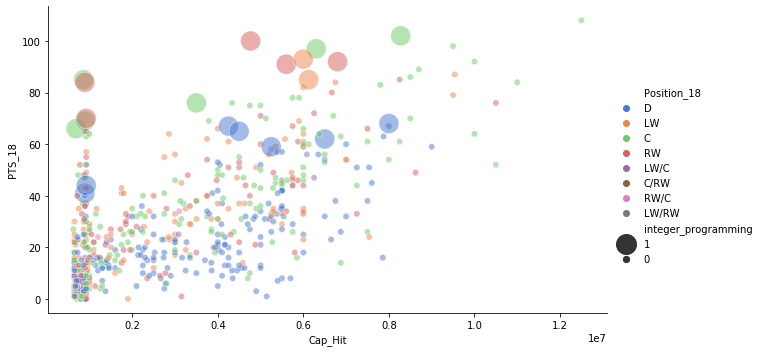

In [43]:
sns.relplot(x="Cap_Hit", y="PTS_18", 
            hue="Position_18", size='integer_programming',
            size_order=[1,0],
            sizes=(40, 400), alpha=.5, 
            palette="muted", height=5, aspect=1.75,
            data=nhl18_filt)

In [44]:
(XI[['index','Position_18','PTS_18','Cap_Hit']]
 .sort_values(['Position_18'])
 .reset_index(drop=True))

,index,Position_18,PTS_18,Cap_Hit
0,BARZALMATHEW,C,85,863333.0
1,POINTBRAYDEN,C,66,686667.0
2,GIROUXCLAUDE,C,102,8275000.0
3,STAALERIC,C,76,3500000.0
4,MACKINNONNATHAN,C,97,6300000.0
5,MARNERMITCHELL,C,69,894167.0
6,GOSTISBEHERESHAYNE,D,65,4500000.0
7,KRUGTOREY,D,59,5250000.0
8,BUTCHERWILL,D,44,925000.0
9,CARLSONJOHN,D,68,8000000.0


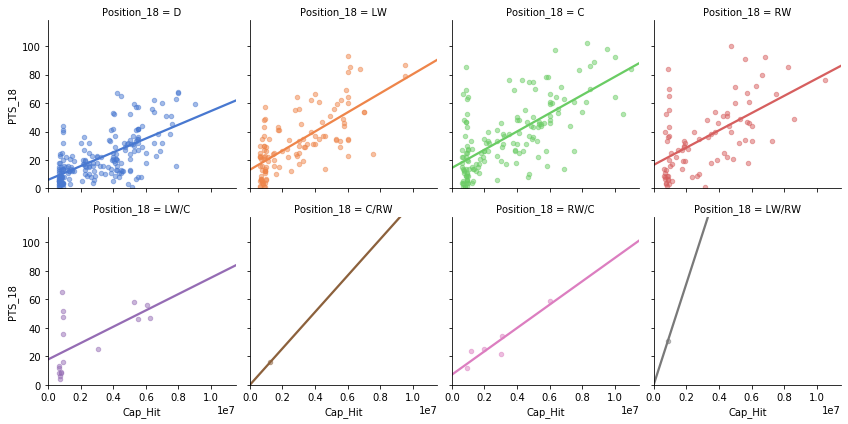

In [45]:
sns.lmplot(x="Cap_Hit", y="PTS_18", col="Position_18", hue="Position_18", 
           data=nhl18_filt[nhl18_filt.PTS_18 != 0],
           col_wrap=4, ci=None, palette="muted", height=3,
#            hue_order=['DEF','GK','MID', 'STR'],
#            col_order=['DEF','GK','MID', 'STR'],
           scatter_kws={"s": 20, "alpha": 0.5})
plt.xlim(0, 1000000+max(nhl18_filt.SALARY));
plt.ylim(0, 10+max(nhl18_filt.PTS_18));

In [46]:
slope_inter = {}
for pos in np.unique(nhl18_filt.Position_18):
    pos_data = nhl18_filt[(nhl18_filt.Position_18 == pos) & (nhl18_filt.PTS_18 > 0)].reset_index(drop=True)
    output = linregress(pos_data['Cap_Hit'],pos_data['PTS_18'])
    print("For {}, y = {:f}x + {:0.3f}".format(pos, output.slope, output.intercept))
    slope_inter[pos] = {"slope":output.slope, "intercept":output.intercept}

For C, y = 0.000006x + 14.398
For C/RW, y = nanx + nan
For D, y = 0.000005x + 6.049
For LW, y = 0.000007x + 13.130
For LW/C, y = 0.000006x + 17.840
For LW/RW, y = nanx + nan
For RW, y = 0.000006x + 16.566
For RW/C, y = 0.000008x + 7.124


/Users/noiseuce/miniconda3/envs/pool/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:107: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/noiseuce/miniconda3/envs/pool/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:117: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/noiseuce/miniconda3/envs/pool/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:119: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
